In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import pearsonr


# Set the default plots style
sns.set_theme(style="white")

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['axes.spines.left'] = True

# Set the default tick_params options for all axes
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['xtick.top'] = False
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.left'] = True
mpl.rcParams['ytick.right'] = False
mpl.rcParams['ytick.direction'] = 'out'

# Supplemental figure1
- More detailed Training precedure (?)
- histgram of the subject number for each age
    - Game1&Game2
- histgram of the dropout subject number for each age
- histgram of the mean training number for each age

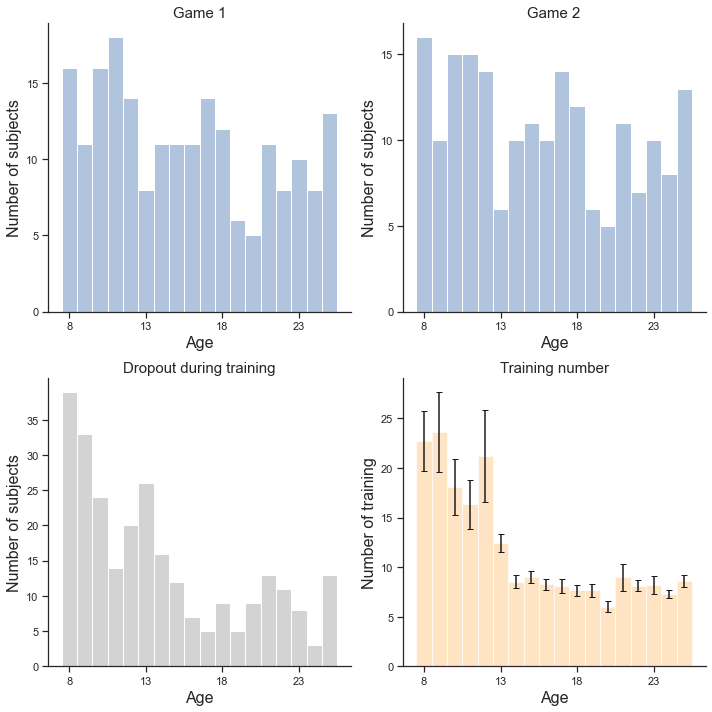

In [188]:
# Read data for game 1
participants_file = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data_game1 = pd.read_csv(participants_file, sep='\t')
data_game1 = data_game1[data_game1['game1_fmri'] >= 0.5]

# Read data for game 2
data_game2 = pd.read_csv(participants_file, sep='\t')
data_game2 = data_game2[data_game2['game2_fmri'] >= 0.5]

# Read dropout data
dropout_file = pd.read_excel(r"/mnt/workdir/DCM/Result/analysis/Online_training/participants_drop_out.xlsx")

# Read training data
training_file = pd.read_excel(r'/mnt/workdir/DCM/Result/analysis/Online_training/Valid information_203.xlsx')

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10,10))
bar_width = 1
# Plot for game 1
ages_game1 = [group[0] for group in data_game1.groupby('Age')]
nums_game1 = [len(group[1]) for group in data_game1.groupby('Age')]

rects1 = axs[0, 0].bar(ages_game1, nums_game1,width=bar_width,color='lightsteelblue')
axs[0, 0].set_xlabel("Age", size=16)
axs[0, 0].set_ylabel("Number of subjects", size=16)
axs[0, 0].set_xticks(np.arange(min(ages_game1), max(ages_game1)+1, 5))  # Set x-ticks to appear every 5 years
axs[0, 0].set_yticks(np.arange(0, max(nums_game1)+1, 5))  # Set y-ticks to appear every 5 units
axs[0, 0].set_title("Game 1", size=15)
#axs[0, 0].bar_label(rects1, padding=3, size=14)

# Plot for game 2
ages_game2 = [group[0] for group in data_game2.groupby('Age')]
nums_game2 = [len(group[1]) for group in data_game2.groupby('Age')]

rects2 = axs[0, 1].bar(ages_game2, nums_game2,width=bar_width,color='lightsteelblue')
axs[0, 1].set_xlabel("Age", size=16)
axs[0, 1].set_ylabel("Number of subjects", size=16)
axs[0, 1].set_xticks(np.arange(min(ages_game2), max(ages_game2)+1, 5))  # Set x-ticks to appear every 5 years
axs[0, 1].set_yticks(np.arange(0, max(nums_game1)+1, 5))  # # Set y-ticks to be same as game 1
axs[0, 1].set_title("Game 2", size=15)
#axs[0, 1].bar_label(rects2, padding=3, size=14)

# Plot for dropout
ages_dropout = [group[0] for group in dropout_file.groupby('Age')]
nums_dropout = [len(group[1]) for group in dropout_file.groupby('Age')]

rects3 = axs[1, 0].bar(ages_dropout, nums_dropout,width=bar_width, color='lightgrey')
axs[1, 0].set_xlabel("Age", size=16)
axs[1, 0].set_ylabel("Number of subjects", size=16)
axs[1, 0].set_xticks(np.arange(min(ages_dropout), max(ages_dropout)+1, 5))
axs[1, 0].set_yticks(np.arange(0, max(nums_dropout), 5))
axs[1, 0].set_title("Dropout during training", size=15)
#axs[1, 0].bar_label(rects3, padding=3, size=14)

# Calculate the mean and se of total_counts for each age
mean_counts = training_file.groupby('Age')['Total_Counts'].mean()
se_counts = training_file.groupby('Age')['Total_Counts'].sem()

# Define the x positions for the bars
ages = mean_counts.index

# Plot the bar plot with error bars
axs[1, 1].bar(ages, mean_counts, yerr=se_counts, capsize=3,width=bar_width,linewidth=0.6, color='bisque')

# Set the x-axis limits, ticks, and labels
axs[1, 1].set_xticks([8,13,18,23])
axs[1, 1].set_xticklabels([8,13,18,23])

# Set the labels and title
axs[1, 1].set_xlabel("Age", size=16)
axs[1, 1].set_ylabel("Number of training", size=16)
axs[1, 1].set_title("Training number", size=15)

# Add tick lines to the bottom and left spines for all subplots
for ax in axs.flat:
    #ax.set_xticks(np.arange(min(training_file['Age']), max(training_file['Age'])+1, 5))
    ax.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
    ax.tick_params(axis='y', which='both', left=True, right=False, direction='out')

fig.tight_layout()

# Save the figure
savepath = r'/mnt/workdir/DCM/Result/paper/sf/sf1/subjects_barplot.pdf'
plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

#### Supplemental figure2:
- heatmap for poistion and bar radar plot for sampling angle
- hexagonal modulation(F-test) (?)
- RSA (?)
    - whole trials results

In [2]:
# Get subject's trial attribute
from analysis.mri.event.base import GAME1EV

class GAME1EV_trials_attribute(GAME1EV):
    def __init__(self, behDataPath):
        GAME1EV.__init__(self, behDataPath)

    def get_trial_attribute(self,phi):
        angle = self.behData['angles']
        pic1_ap = self.behData['pic1_ap']
        pic1_dp = self.behData['pic1_dp']

        pic2_ap = self.behData['pic2_ap']
        pic2_dp = self.behData['pic2_dp']
        distance = np.sqrt(self.behData['ap_diff'] ** 2 + self.behData['dp_diff'] ** 2)
        trials_info = pd.DataFrame({'pic1_ap':pic1_ap,'pic1_dp':pic1_dp,'pic2_ap':pic2_ap,'pic2_dp':pic2_dp,
                                    'angle':angle,'distance':distance})
        trial_label,_ = self.label_trial_corr()
        trials_info['trial_corr'] = [1 if t else 0 for t in trial_label]

        # according to hexagonal effect and split distance into two types(align and misalign)
        # label alignment trials and misalignment trials according to the angle and Phi
        alignedD_360 = [(a-phi) % 360 for a in angle]
        anglebinNum = [round(a/30)+1 for a in alignedD_360]
        anglebinNum = [1 if a == 13 else a for a in anglebinNum]

        trials_alignment = []
        for binNum in anglebinNum:
            if binNum in range(1,13,2):
                trials_alignment.append(f'align')
            elif binNum in range(2,13,2):
                trials_alignment.append(f'misalign')
        trials_info['alignment'] = trials_alignment
        return trials_info

task = 'game1'
if task == 'game1':
    runs = range(1, 7)
    behav_template = '/mnt/workdir/DCM/sourcedata/sub_{}/Behaviour/' \
                     'fmri_task-game1/sub-{}_task-{}_run-{}.csv'
elif task == 'game2':
    runs = range(1, 3)
    behav_template = '/mnt/workdir/DCM/sourcedata/sub_{}/Behaviour/' \
                     'fmri_task-game2-test/sub-{}_task-{}_run-{}.csv'
else:
    raise Exception("You need specify a correct task name.")

participants_data = pd.read_csv('/mnt/workdir/DCM/BIDS/participants.tsv', sep='\t')
subjects = participants_data.query(f'{task}_fmri>=0.5')['Participant_ID'].str.split('-').str[-1].str.zfill(3)

phis_file = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/hexagon_spct/estPhi_ROI-EC_circmean_trial-all.csv'
phis_data = pd.read_csv(phis_file)

df = pd.DataFrame()
for subj in subjects:
    #print(f'----sub-{subj}----')
    phi = phis_data.query(f'(sub_id=="sub-{subj}")and(ifold=="6fold")')['Phi_mean'].values[0]
    for idx in runs:
        run_id = str(idx)
        behav_path = behav_template.format(subj, subj, task, run_id)
        game1ev = GAME1EV_trials_attribute(behav_path)
        trials_info = game1ev.get_trial_attribute(phi)
        trials_info['sub_id'] = 'sub-' + subj
        df = df.append(trials_info,ignore_index=True)
df.to_csv('/mnt/workdir/DCM/Result/paper/sf/sf2/trials_attribute.csv',index=False)
print('Completed.')

Completed.


<ipython-input-48-153820a4a49b>:64: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axs[1] = plt.subplot(1,2,2, projection='polar')


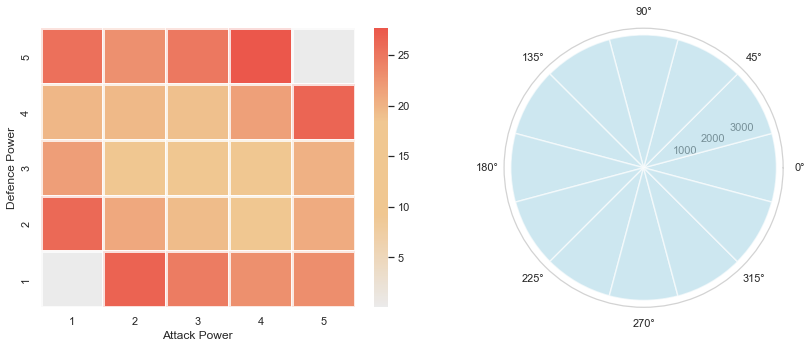

In [48]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

df = pd.read_csv('/mnt/workdir/DCM/Result/paper/sf/sf2/trials_attribute.csv')
#df = df[df['trial_corr']==1]
m1_pos_matrix = np.zeros((5,5))
m2_pos_matrix = np.zeros((5,5))

for row in df.itertuples():
    m1_pos_matrix[int(5-row.pic1_dp),int(row.pic1_ap-1)] +=1
    m2_pos_matrix[int(5-row.pic2_dp),int(row.pic2_ap-1)] +=1

pos_matrix = m1_pos_matrix + m2_pos_matrix

fig, axs = plt.subplots(1, 2, figsize=(12,5))
# define start and end color
start_color = [0.9, 0.9, 0.9]
middle_color1 = [0.9284313725490196, 0.7245098039215687, 0.46176470588235297]#'#f48c06'# white
middle_color2 = [0.9284313725490196, 0.7245098039215687, 0.46176470588235297]#[252/255, 90/255, 60/255] # light orange
end_color = [0.9019607843137255, 0.17647058823529413, 0.11764705882352941]#'#d00000'# red-orange

# Create a colormap with more color distinction
cmap = LinearSegmentedColormap.from_list("my_colormap", [start_color, middle_color1,middle_color2,end_color])


# plot heatmap for position matrix
sns.heatmap(pos_matrix/203, ax=axs[0],cmap=cmap,alpha=0.8,annot=False, fmt=".0f", annot_kws={"size": 12,"color": "black"},
            cbar_kws={'ticks': [0,5,10,15,20,25]},
            linecolor="white", linewidths=3)

# change x and y-axis labels
axs[0].set_xticklabels([1,2,3,4,5])
axs[0].set_yticklabels([5,4,3,2,1])
# Add x and y-axis titles
axs[0].set_xlabel("Attack Power")
axs[0].set_ylabel("Defence Power")

def angle2binNum(angles):
    alignedD_360 = [a % 360 for a in angles]
    anglebinNum = [round(a/30)+1 for a in alignedD_360]
    anglebinNum = [1 if binN == 13 else binN for binN in anglebinNum]

    # Compute pie slices
    N = int(360/30)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    binsAngleNum = []
    for binNum in range(1,13):
        binAngleNum = 0
        for a in anglebinNum:
            if a == binNum:
                binAngleNum +=1
        binsAngleNum.append(binAngleNum)
    return binsAngleNum

angles = df['angle'].to_list()
# plot the distribution of the stalemate trials
binsAngleNum = angle2binNum(angles)
binsAngleNum = [b for b in binsAngleNum]
N = int(360/30)
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
width = 2*np.pi / (N)

# Polar plot
axs[1] = plt.subplot(1,2,2, projection='polar')
axs[1].bar(theta, binsAngleNum,width=width,bottom=0.0, alpha=0.6,linewidth=1.5,edgecolor='white',color='lightblue')
axs[1].set_yticks([1000,2000,3000])
axs[1].grid(alpha=0.6, color='white', lw=3)
# Change the color of the x-axis line
axs[1].spines['polar'].set_color('lightgrey')

plt.tight_layout()
plt.savefig('/mnt/workdir/DCM/Result/paper/sf/sf2/trials_sample/trials_sample_frequency.pdf',dpi=300,bbox_inches='tight',pad_inches=0,transparent=True)
plt.show()

# Supplemental figure3:
- ROI analysis for other region's distance effect:
    - such as HC,EC,LOFC,PCC
    - covariate effect
- Distancne distribution between align vs misalign
- Distance code(algin - misalign) covary with age in EC.

### Distancne distribution between align vs misalign

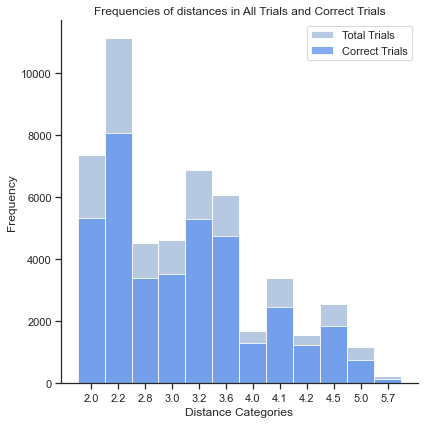

In [4]:
df = pd.read_csv('/mnt/workdir/DCM/Result/paper/sf/sf2/trials_attribute.csv')

# Ensure 'distance' is treated as a categorical variable
df['distance'] = df['distance'].round(1)
df['distance'] = df['distance'].astype(str)

# Get the unique categories and sort them
categories = sorted(df['distance'].unique())

# Count occurrences of each category for all trials and correct trials
all_counts = df['distance'].value_counts().sort_index()
correct_counts = df[df['trial_corr'] == 1]['distance'].value_counts().sort_index()

# Create an array for the positions of the bars on the x-axis
ind = np.arange(len(categories))

# Initialize the matplotlib figure
plt.figure(figsize=(6, 6))

# Width of the bars
width = 1

# Create bar plots
plt.bar(ind, all_counts, width, label='Total Trials', alpha=0.9, color='lightsteelblue')
plt.bar(ind, correct_counts, width, label='Correct Trials', alpha=0.8, color='cornflowerblue')

# Add a legend and informative axis label
plt.legend()
plt.ylabel("Frequency")
plt.title("Frequencies of distances in All Trials and Correct Trials")

# x-axis configurations
plt.xticks(ind, categories)
plt.xlabel("Distance Categories")

# Add tick lines to the bottom and left spines for all subplots
plt.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
plt.tick_params(axis='y', which='both', left=True, right=False, direction='out')


plt.tight_layout()
plt.savefig(r'/mnt/workdir/DCM/Result/paper/sf/sf3/distance_sample_distribution.pdf',dpi=300,bbox_inches='tight',pad_inches=0,transparent=True)
# Show the plot
plt.show()

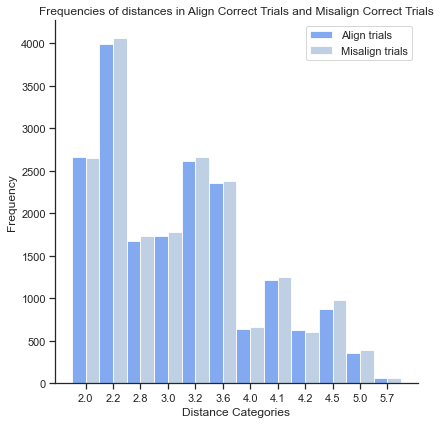

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the csv
df = pd.read_csv('/mnt/workdir/DCM/Result/paper/sf/sf2/trials_attribute.csv')

# Ensure 'distance' is treated as a categorical variable
df['distance'] = df['distance'].round(1)
df['distance'] = df['distance'].astype(str)

# Get the unique categories and sort them
categories = sorted(df['distance'].unique())

# Count occurrences of each category for align and misalign correct trials
align_counts = df[(df['trial_corr'] == 1) & (df['alignment'] == 'align')]['distance'].value_counts().sort_index()
misalign_counts = df[(df['trial_corr'] == 1) & (df['alignment'] == 'misalign')]['distance'].value_counts().sort_index()

# Create an array for the positions of the bars on the x-axis
ind = np.arange(len(categories))

# Initialize the matplotlib figure
plt.figure(figsize=(6, 6))

# Width of the bars
width = 0.5

# Create bar plots
plt.bar(ind, align_counts, width, label='Align trials', alpha=0.8, color='cornflowerblue')
plt.bar(ind+width, misalign_counts, width, label='Misalign trials', alpha=0.8, color='lightsteelblue')

# Add a legend and informative axis label
plt.legend()
plt.ylabel("Frequency")
plt.title("Frequencies of distances in Align Correct Trials and Misalign Correct Trials")

# x-axis configurations
plt.xticks(ind + width / 2, categories)
plt.xlabel("Distance Categories")

# Add tick lines to the bottom and left spines for all subplots
plt.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
plt.tick_params(axis='y', which='both', left=True, right=False, direction='out')

plt.tight_layout()
plt.savefig(r'/mnt/workdir/DCM/Result/paper/sf/sf3/distance_sample_distribution_alignVSmisalign.pdf',dpi=300,bbox_inches='tight',pad_inches=0,transparent=True)

# Show the plot
plt.show()

### ROI analysis for distance effect

/home/dell/Software/anaconda3/lib/python3.8/site-packages/nilearn/image/image.py:1041: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)
<ipython-input-35-1769792c4f51>:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[roi_name] = roi_activity
/home/dell/Software/anaconda3/lib/python3.8/site-packages/pandas/core/common.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

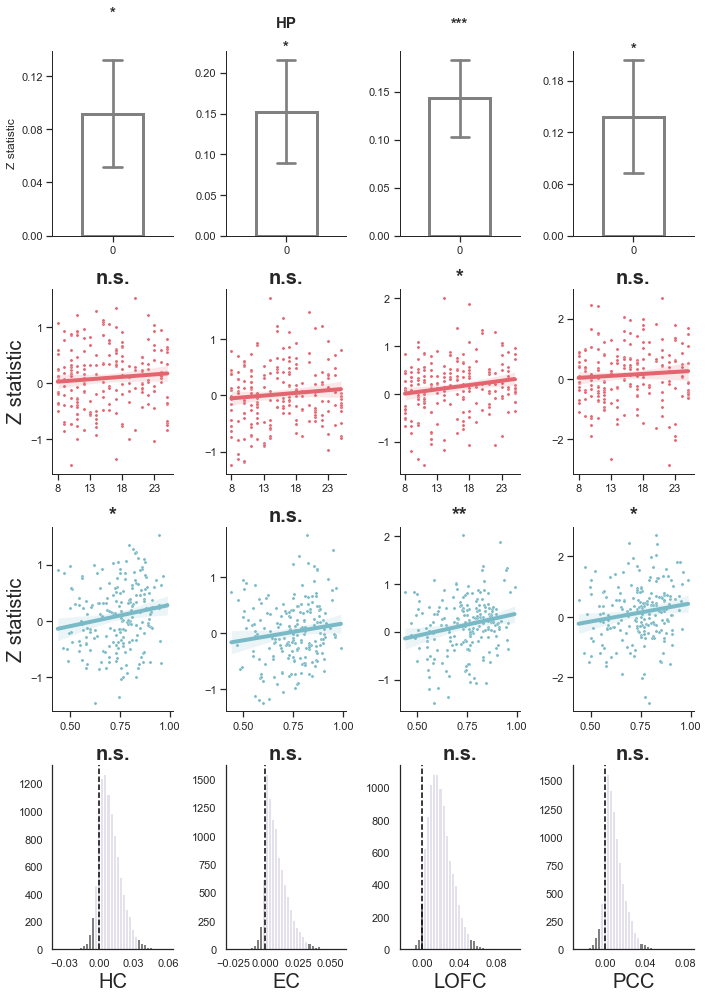

In [35]:
from nilearn import masking, image
from scipy.stats import ttest_1samp, pearsonr,ttest_ind
from matplotlib.ticker import MaxNLocator
from scipy.stats import zscore

def p2sign(p):
    if  p<=0.001:
        sign='***'
    elif p<=0.01:
        sign='**'
    elif p<=0.05:
        sign='*'
    else:
        sign='n.s.'
    return sign


def apply_mask_and_get_activity(cmap_paths, mask):
    return np.mean(masking.apply_mask(cmap_paths, mask), axis=1)


def plot_mean_activity(subs_mean_activity, ax, roi_name):
    t_statistic, p_value = ttest_1samp(subs_mean_activity, 0)
    sns.barplot(data=subs_mean_activity, errorbar="se", capsize=.15, errcolor="0.5",
                linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0),width=0.5,
                ax=ax)
    ax.hlines(y=0, xmin=-0.45, xmax=0.45, colors='black', linestyles='--', linewidth=0.7)
    ax.set_ylabel('Z statistic')
    ax.set_xlabel(roi_name)
    sns.despine(top=True, right=True)
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    plt.xticks([-0.5, 0.5])
    ax.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
    ax.tick_params(axis='y', which='both', left=True, right=False, direction='out')
    ax.text(0, subs_mean_activity.mean()+0.07, p2sign(p_value),ha='center', va='bottom',weight='bold',size=15)


def plot_covariate_relationship(sub_data,covariate_name, activity_data, ax, roi_name):
    # Setup variables based on covariate
    if covariate_name == 'Age':
        color = '#e36570'
        covary_variable = sub_data['Age'].to_list()
        xlabel = 'Age'
        ticks = [8, 12, 16, 20, 24]

    elif covariate_name == 'Acc':
        color = '#7abac6'
        covary_variable = sub_data['game1_acc'].to_list()
        xlabel = 'Inference performance'
        ticks = [0.4,0.6,0.8,1.0]
    sns.scatterplot(x=covary_variable, y=activity_data, color=color, s=10, alpha=1, ax=ax)
    sns.regplot(x=covary_variable, y=activity_data, color=color, order=1, scatter=False,line_kws={'linewidth': 4}, ax=ax)
    ax.set_xlabel(roi_name, fontsize=20)
    ax.set_ylabel('Z statistic', fontsize=20)
    sns.despine(top=True, right=True)
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    r, p = pearsonr(covary_variable, activity_data)
    title = p2sign(p)
    ax.set_title(title, size=20, fontweight='bold')
    ax.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
    ax.tick_params(axis='y', which='both', left=True, right=False, direction='out')


def perform_mediation_analysis(data, x, m, y):
    # Z-score normalization for x, m, y variables
    data[[x, m, y]] = data[[x,m[0],y]].apply(zscore)
    mediation_results, indirect_effects = pg.mediation_analysis(data=data,
                                                                x=x, m=m, y=y, seed=42, n_boot=10000, return_dist=True)
    return mediation_results, indirect_effects


def plot_mediation_distribution(indirect_effects, ax, ci=0.95):
    lower = np.percentile(indirect_effects, (1 - ci) / 2 * 100)
    upper = np.percentile(indirect_effects, (1 + ci) / 2 * 100)
    n, bins, patches = ax.hist(indirect_effects, color='grey',bins=36)
    max_height = max(n)
    ax.axvline(x=0, ymin=0, ymax=max_height, color='black', linestyle='--')
    for i in range(len(patches)):
        if lower <= bins[i] < upper:
            patches[i].set_fc('#E5E1EC')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if lower > 0:
        med_title = '*'
    else:
        med_title = 'n.s.'
    ax.set_title(med_title, size=20, fontweight='bold')


# specify subjects
participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
participants_data = pd.read_csv(participants_tsv, sep='\t')
data = participants_data.query('game1_fmri>=0.5')
subjects = data['Participant_ID'].to_list()
hp_data = data.query('game1_acc > 0.8')

# set camp
#cmap_template = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game2/hexagon_diff/Setall/6fold/{}/zmap/hexagon_zmap.nii.gz'
cmap_template = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/distance_spct/Setall/6fold/{}/zmap/distance_zmap.nii.gz'
sub_cmap_paths = [cmap_template.format(sub_id) for sub_id in subjects]
hp_sub_cmap_paths = [cmap_template.format(sub_id) for sub_id in hp_data['Participant_ID'].to_list()]

# set roi
lhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/lHC_MNI152NL.nii.gz')
rhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/rHC_MNI152NL.nii.gz')
hc = image.math_img('np.logical_or(img1,img2)', img1=lhc, img2=rhc)

ec  = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/EC/juelich_EC_MNI152NL_prob.nii.gz')
ec = image.binarize_img(ec,5)

mPFC = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/Park_Grid_ROI/mPFC_GP_roi.nii')

lofc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/lh.lateralorbitofrontal.nii.gz') #parsorbitalis
rofc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/rh.lateralorbitofrontal.nii.gz')
ofc = image.math_img('np.logical_or(img1,img2)', img1=lofc, img2=rofc)

pcc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/PCC/PCCk3_MNI152Nl_bin.nii.gz')
roi_names = ['HC', 'EC','mPFC', 'LOFC', 'PCC']

# Compute mean activity
# Apply masks and get activity for each ROI
roi_activities = [apply_mask_and_get_activity(sub_cmap_paths, m) for m in [hc, ec, mPFC, ofc, pcc]]
ec_hp_sub_act = apply_mask_and_get_activity(hp_sub_cmap_paths, ec)

fig, axes = plt.subplots(4, 4, figsize=(10, 14))

# Plot the mean activity for each ROI
for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
    if roi_name == 'EC':
        plot_mean_activity(ec_hp_sub_act,axes[0, i], roi_name)
        axes[0, i].text(0, ec_hp_sub_act.mean()+0.1, "HP",ha='center', va='bottom',weight='bold',size=15)
    else:
        plot_mean_activity(roi_activity, axes[0, i], roi_name)
        # Set y-axis to have a maximum of 3 ticks
        axes[0, i].yaxis.set_major_locator(MaxNLocator(nbins=4))
    if i > 0:
        axes[0, i].set_ylabel('')

# Plot the covariate relationship for each ROI with 'Age'
for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
    plot_covariate_relationship(data,'Age', roi_activity, axes[1, i], roi_name)
    if i > 0:
        axes[1, i].set_ylabel('')  # Hide y label for plots other than the leftmost
    axes[1, i].set_xticks([8, 13, 18, 23])  # Change x-ticks
    axes[1, i].yaxis.set_major_locator(MaxNLocator(nbins=4)) # Change y-ticks

# Plot the covariate relationship for each ROI with 'Acc'
for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
    plot_covariate_relationship(data,'Acc', roi_activity, axes[2, i], roi_name)
    if i > 0:
        axes[2, i].set_ylabel('')  # Hide y label for plots other than the leftmost
    axes[2, i].set_xticks([0.5, 0.75, 1.0])  # Change x-ticks
    axes[2, i].yaxis.set_major_locator(MaxNLocator(nbins=4))

# # loop through each ROI to perform mediation analysis:
# roi_mediation_results = {}
# roi_indirect_effects = {}
# for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
#     # Add the mean ROI activity to the data
#     data[roi_name] = roi_activity
#     mediation_results, indirect_effects = perform_mediation_analysis(data, 'Age', [roi_name], 'game1_acc')
#     roi_mediation_results[roi_name] = mediation_results
#     roi_indirect_effects[roi_name] = indirect_effects

# # Plot the mediation distribution for each ROI
# for i, (roi_name, indirect_effects) in enumerate(roi_indirect_effects.items()):
#     plot_mediation_distribution(indirect_effects, axes[3, i])
#     if i > 0:
#         axes[3, i].set_ylabel('')
#     axes[3,i].set_xlabel(roi_name, fontsize=20)
#     axes[3, i].xaxis.set_major_locator(MaxNLocator(nbins=4))
#     #axes[3, i].set_xticks([0, 0.001])  # Hide y ticks

# Hide x labels for plots other than those in the bottom row
for i in range(4):
    for j in range(3):
        if i < 2:
            axes[i, j].set_xlabel('')

# Show the plot
plt.tight_layout()
plt.savefig(r'/mnt/workdir/DCM/Result/paper/sf/sf3/distance_multi-ROIs_effect1.pdf',dpi=300,bbox_inches='tight',pad_inches=0,transparent=True)
plt.show()

### ROI analysis for distance effect(Align - misalign)

/home/dell/Software/anaconda3/lib/python3.8/site-packages/nilearn/image/image.py:1041: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)
<ipython-input-42-4bdd6bd49814>:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[roi_name] = roi_activity
/home/dell/Software/anaconda3/lib/python3.8/site-packages/pandas/core/common.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

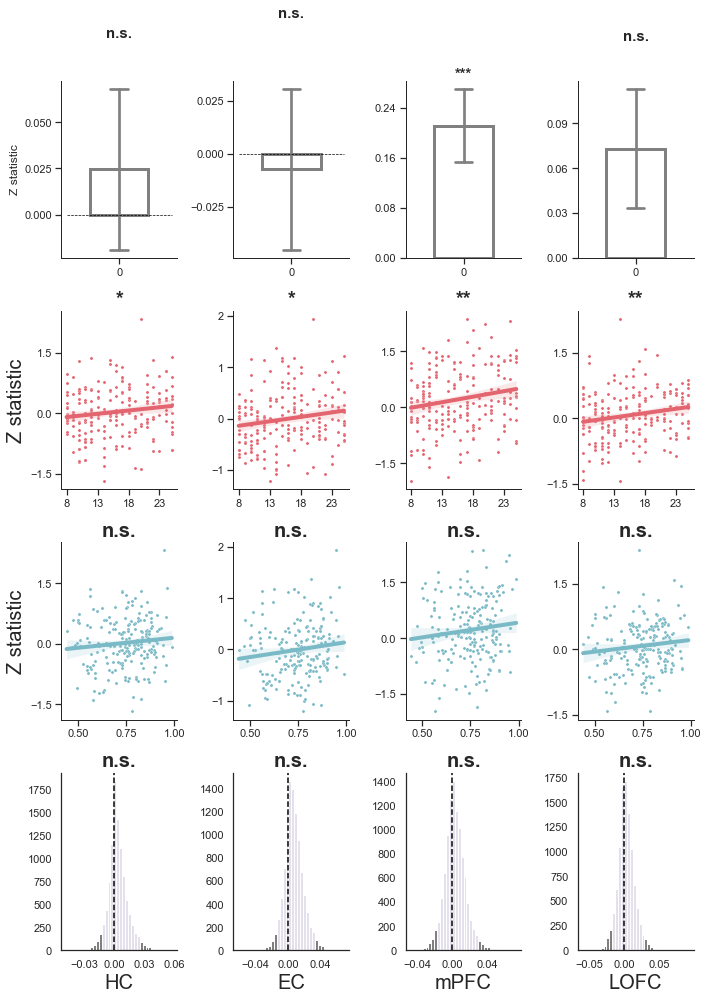

In [42]:
from nilearn import masking, image
from scipy.stats import ttest_1samp, pearsonr,ttest_ind
from matplotlib.ticker import MaxNLocator
from scipy.stats import zscore

def p2sign(p):
    if  p<=0.001:
        sign='***'
    elif p<=0.01:
        sign='**'
    elif p<=0.05:
        sign='*'
    else:
        sign='n.s.'
    return sign


def apply_mask_and_get_activity(cmap_paths, mask):
    return np.mean(masking.apply_mask(cmap_paths, mask), axis=1)


def plot_mean_activity(subs_mean_activity, ax, roi_name):
    t_statistic, p_value = ttest_1samp(subs_mean_activity, 0)
    sns.barplot(data=subs_mean_activity, errorbar="se", capsize=.15, errcolor="0.5",
                linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0),width=0.5,
                ax=ax)
    ax.hlines(y=0, xmin=-0.45, xmax=0.45, colors='black', linestyles='--', linewidth=0.7)
    ax.set_ylabel('Z statistic')
    ax.set_xlabel(roi_name)
    sns.despine(top=True, right=True)
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    plt.xticks([-0.5, 0.5])
    ax.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
    ax.tick_params(axis='y', which='both', left=True, right=False, direction='out')
    ax.text(0, subs_mean_activity.mean()+0.07, p2sign(p_value),ha='center', va='bottom',weight='bold',size=15)


def plot_covariate_relationship(sub_data,covariate_name, activity_data, ax, roi_name):
    # Setup variables based on covariate
    if covariate_name == 'Age':
        color = '#e36570'
        covary_variable = sub_data['Age'].to_list()
        xlabel = 'Age'
        ticks = [8, 12, 16, 20, 24]

    elif covariate_name == 'Acc':
        color = '#7abac6'
        covary_variable = sub_data['game1_acc'].to_list()
        xlabel = 'Inference performance'
        ticks = [0.4,0.6,0.8,1.0]
    sns.scatterplot(x=covary_variable, y=activity_data, color=color, s=10, alpha=1, ax=ax)
    sns.regplot(x=covary_variable, y=activity_data, color=color, order=1, scatter=False,line_kws={'linewidth': 4}, ax=ax)
    ax.set_xlabel(roi_name, fontsize=20)
    ax.set_ylabel('Z statistic', fontsize=20)
    sns.despine(top=True, right=True)
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    r, p = pearsonr(covary_variable, activity_data)
    title = p2sign(p)
    ax.set_title(title, size=20, fontweight='bold')
    ax.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
    ax.tick_params(axis='y', which='both', left=True, right=False, direction='out')


def perform_mediation_analysis(data, x, m, y):
    # Z-score normalization for x, m, y variables
    data[[x, m, y]] = data[[x,m[0],y]].apply(zscore)
    mediation_results, indirect_effects = pg.mediation_analysis(data=data,
                                                                x=x, m=m, y=y, seed=42, n_boot=10000, return_dist=True)
    return mediation_results, indirect_effects


def plot_mediation_distribution(indirect_effects, ax, ci=0.95):
    lower = np.percentile(indirect_effects, (1 - ci) / 2 * 100)
    upper = np.percentile(indirect_effects, (1 + ci) / 2 * 100)
    n, bins, patches = ax.hist(indirect_effects, color='grey',bins=36)
    max_height = max(n)
    ax.axvline(x=0, ymin=0, ymax=max_height, color='black', linestyle='--')
    for i in range(len(patches)):
        if lower <= bins[i] < upper:
            patches[i].set_fc('#E5E1EC')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if lower > 0:
        med_title = '*'
    else:
        med_title = 'n.s.'
    ax.set_title(med_title, size=20, fontweight='bold')


# specify subjects
participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
participants_data = pd.read_csv(participants_tsv, sep='\t')
data = participants_data.query('game1_fmri>=0.5')
subjects = data['Participant_ID'].to_list()
hp_data = data.query('game1_acc > 0.8')

# set camp
cmap_template = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/hexModdistance_spct/Setall/6fold/{}/zmap/hexModdistance_zmap.nii.gz'
sub_cmap_paths = [cmap_template.format(sub_id) for sub_id in subjects]
hp_sub_cmap_paths = [cmap_template.format(sub_id) for sub_id in hp_data['Participant_ID'].to_list()]

# set roi
lhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/lHC_MNI152NL.nii.gz')
rhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/rHC_MNI152NL.nii.gz')
hc = image.math_img('np.logical_or(img1,img2)', img1=lhc, img2=rhc)

ec  = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/EC/juelich_EC_MNI152NL_prob.nii.gz')
ec = image.binarize_img(ec,5)

mPFC = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/Park_Grid_ROI/mPFC_GP_roi.nii')

lofc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/lh.lateralorbitofrontal.nii.gz') #parsorbitalis
rofc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/rh.lateralorbitofrontal.nii.gz')
ofc = image.math_img('np.logical_or(img1,img2)', img1=lofc, img2=rofc)

roi_names = ['HC', 'EC', 'mPFC','LOFC']

# Compute mean activity
# Apply masks and get activity for each ROI
roi_activities = [apply_mask_and_get_activity(sub_cmap_paths, m) for m in [hc, ec, mPFC, ofc]]

fig, axes = plt.subplots(4, 4, figsize=(10, 14))

# Plot the mean activity for each ROI
for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
    plot_mean_activity(roi_activity, axes[0, i], roi_name)
    # Set y-axis to have a maximum of 3 ticks
    axes[0, i].yaxis.set_major_locator(MaxNLocator(nbins=4))
    if i > 0:
        axes[0, i].set_ylabel('')

# Plot the covariate relationship for each ROI with 'Age'
for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
    plot_covariate_relationship(data,'Age', roi_activity, axes[1, i], roi_name)
    if i > 0:
        axes[1, i].set_ylabel('')  # Hide y label for plots other than the leftmost
    axes[1, i].set_xticks([8, 13, 18, 23])  # Change x-ticks
    axes[1, i].yaxis.set_major_locator(MaxNLocator(nbins=4)) # Change y-ticks

# Plot the covariate relationship for each ROI with 'Acc'
for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
    plot_covariate_relationship(data,'Acc', roi_activity, axes[2, i], roi_name)
    if i > 0:
        axes[2, i].set_ylabel('')  # Hide y label for plots other than the leftmost
    axes[2, i].set_xticks([0.5, 0.75, 1.0])  # Change x-ticks
    axes[2, i].yaxis.set_major_locator(MaxNLocator(nbins=4))

# loop through each ROI to perform mediation analysis:
roi_mediation_results = {}
roi_indirect_effects = {}
for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
    # Add the mean ROI activity to the data
    data[roi_name] = roi_activity
    mediation_results, indirect_effects = perform_mediation_analysis(data, 'Age', [roi_name], 'game1_acc')
    roi_mediation_results[roi_name] = mediation_results
    roi_indirect_effects[roi_name] = indirect_effects

# Plot the mediation distribution for each ROI
for i, (roi_name, indirect_effects) in enumerate(roi_indirect_effects.items()):
    plot_mediation_distribution(indirect_effects, axes[3, i])
    if i > 0:
        axes[3, i].set_ylabel('')
    axes[3,i].set_xlabel(roi_name, fontsize=20)
    axes[3, i].xaxis.set_major_locator(MaxNLocator(nbins=4))
    #axes[3, i].set_xticks([0, 0.001])  # Hide y ticks

# Hide x labels for plots other than those in the bottom row
for i in range(3):
    for j in range(4):
        if i < 3:
            axes[i, j].set_xlabel('')

# Show the plot
plt.tight_layout()
plt.savefig(r'/mnt/workdir/DCM/Result/paper/sf/sf3/hexModdistance_multi-ROIs_effect.pdf',dpi=300,bbox_inches='tight',pad_inches=0,transparent=True)
plt.show()

### ROI analysis for value effect

/home/dell/Software/anaconda3/lib/python3.8/site-packages/nilearn/image/image.py:1041: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)
<ipython-input-40-5c04a80d5a99>:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[roi_name] = roi_activity
/home/dell/Software/anaconda3/lib/python3.8/site-packages/pandas/core/common.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

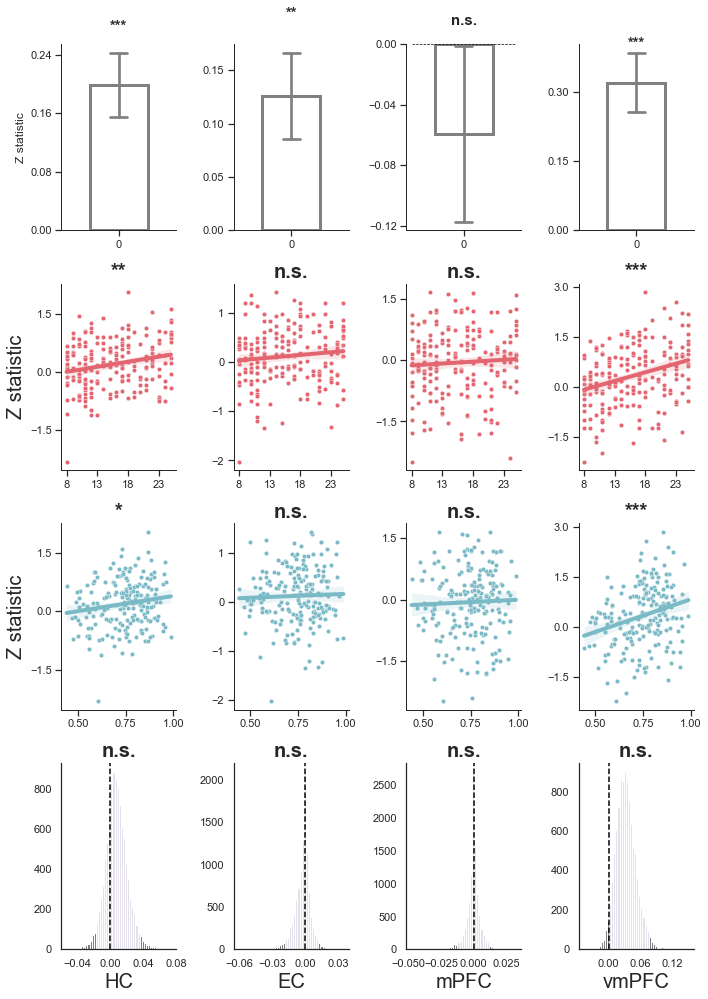

In [40]:
from nilearn import masking, image
from scipy.stats import ttest_1samp, pearsonr,ttest_ind
from matplotlib.ticker import MaxNLocator
import pingouin as pg

def p2sign(p):
    if  p<=0.001:
        sign='***'
    elif p<=0.01:
        sign='**'
    elif p<=0.05:
        sign='*'
    else:
        sign='n.s.'
    return sign


def apply_mask_and_get_activity(cmap_paths, mask):
    return np.mean(masking.apply_mask(cmap_paths, mask), axis=1)


def plot_mean_activity(subs_mean_activity, ax, roi_name):
    t_statistic, p_value = ttest_1samp(subs_mean_activity, 0)
    sns.barplot(data=subs_mean_activity, errorbar="se", capsize=.15, errcolor="0.5",
                linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0),width=0.5,ax=ax)
    ax.hlines(y=0, xmin=-0.45, xmax=0.45, colors='black', linestyles='--', linewidth=0.7)
    ax.set_ylabel('Z statistic')
    ax.set_xlabel(roi_name)
    sns.despine(top=True, right=True)
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    plt.xticks([-0.5, 0.5])
    ax.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
    ax.tick_params(axis='y', which='both', left=True, right=False, direction='out')
    ax.text(0, subs_mean_activity.mean()+0.07, p2sign(p_value),ha='center', va='bottom',weight='bold',size=15)


def plot_covariate_relationship(sub_data,covariate_name, activity_data, ax, roi_name):
    # Setup variables based on covariate
    if covariate_name == 'Age':
        color = '#e36570'
        covary_variable = sub_data['Age'].to_list()
    elif covariate_name == 'Acc':
        color = '#7abac6'
        covary_variable = sub_data['game1_acc'].to_list()
    sns.scatterplot(x=covary_variable, y=activity_data, color=color, s=20, alpha=1, ax=ax)
    sns.regplot(x=covary_variable, y=activity_data, color=color, order=1, scatter=False,line_kws={'linewidth': 4}, ax=ax)
    ax.set_xlabel(roi_name, fontsize=20)
    ax.set_ylabel('Z statistic', fontsize=20)
    sns.despine(top=True, right=True)
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    r, p = pearsonr(covary_variable, activity_data)
    title = p2sign(p)
    ax.set_title(title, size=20, fontweight='bold')
    ax.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
    ax.tick_params(axis='y', which='both', left=True, right=False, direction='out')


def perform_mediation_analysis(data, x, m, y):
    # Z-score normalization for x, m, y variables
    data[[x, m, y]] = data[[x,m[0],y]].apply(zscore)
    mediation_results, indirect_effects = pg.mediation_analysis(data=data,
                                                                x=x, m=m, y=y, seed=42, n_boot=10000, return_dist=True)
    return mediation_results, indirect_effects


def plot_mediation_distribution(indirect_effects, mediation_results, ax, ci=0.95):
    p_value = mediation_results.loc[mediation_results['path'] == 'Indirect', 'pval'].values[0]
    lower = np.percentile(indirect_effects, (1 - ci) / 2 * 100)
    upper = np.percentile(indirect_effects, (1 + ci) / 2 * 100)
    n, bins, patches = ax.hist(indirect_effects, color='grey',bins=50)
    max_height = max(n)
    ax.axvline(x=0, ymin=0, ymax=max_height, color='black', linestyle='--')
    for i in range(len(patches)):
        if lower <= bins[i] < upper:
            patches[i].set_fc('#E5E1EC')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    med_title = p2sign(p_value)
    ax.set_title(med_title, size=20, fontweight='bold')



# specify subjects
participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
participants_data = pd.read_csv(participants_tsv, sep='\t')
data = participants_data.query('game1_fmri>=0.5')
subjects = data['Participant_ID'].to_list()


# set camp
cmap_template = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game1/value_spct/Setall/6fold/{}/zmap/value_zmap.nii.gz'
sub_cmap_paths = [cmap_template.format(sub_id) for sub_id in subjects]

# set roi
lhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/lHC_MNI152NL.nii.gz')
rhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/rHC_MNI152NL.nii.gz')
hc = image.math_img('np.logical_or(img1,img2)', img1=lhc, img2=rhc)

ec  = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/EC/juelich_EC_MNI152NL_prob.nii.gz')
ec = image.binarize_img(ec,5)

mPFC = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/Park_Grid_ROI/mPFC_GP_roi.nii')

vmPFC = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/VMPFC/vmPFC_bin.nii.gz') #parsorbitalis

roi_names = ['HC', 'EC', 'mPFC', 'vmPFC']

# Compute mean activity
# Apply masks and get activity for each ROI
roi_activities = [apply_mask_and_get_activity(sub_cmap_paths, m) for m in [hc, ec, mPFC, vmPFC]]

# Add an extra row to the figure for the mediation plots
fig, axes = plt.subplots(4, 4, figsize=(10, 14))

# Plot the mean activity for each ROI
for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
    plot_mean_activity(roi_activity, axes[0, i], roi_name)
    # Set y-axis to have a maximum of 3 ticks
    axes[0, i].yaxis.set_major_locator(MaxNLocator(nbins=4))
    if i > 0:
        axes[0, i].set_ylabel('')

# Plot the covariate relationship for each ROI with 'Age'
for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
    plot_covariate_relationship(data,'Age', roi_activity, axes[1, i], roi_name)
    if i > 0:
        axes[1, i].set_ylabel('')  # Hide y label for plots other than the leftmost
    axes[1, i].set_xticks([8, 13, 18, 23])  # Change x-ticks
    axes[1, i].yaxis.set_major_locator(MaxNLocator(nbins=4)) # Change y-ticks

# Plot the covariate relationship for each ROI with 'Acc'
for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
    plot_covariate_relationship(data,'Acc', roi_activity, axes[2, i], roi_name)
    if i > 0:
        axes[2, i].set_ylabel('')  # Hide y label for plots other than the leftmost
    axes[2, i].set_xticks([0.5, 0.75, 1.0])  # Change x-ticks
    axes[2, i].yaxis.set_major_locator(MaxNLocator(nbins=4))

# loop through each ROI to perform mediation analysis:
roi_mediation_results = {}
roi_indirect_effects = {}
for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
    # Add the mean ROI activity to the data
    data[roi_name] = roi_activity
    mediation_results, indirect_effects = perform_mediation_analysis(data, 'Age', [roi_name], 'game1_acc')
    roi_mediation_results[roi_name] = mediation_results
    roi_indirect_effects[roi_name] = indirect_effects

# Plot the mediation distribution for each ROI
for i, (roi_name, indirect_effects) in enumerate(roi_indirect_effects.items()):
    mediation_results = roi_mediation_results[roi_name]
    plot_mediation_distribution(indirect_effects, mediation_results, axes[3, i])
    if i > 0:
        axes[3, i].set_ylabel('')
    axes[3,i].set_xlabel(roi_name, fontsize=20)
    axes[3, i].xaxis.set_major_locator(MaxNLocator(nbins=4))

# Hide x labels for plots other than those in the bottom row
for i in range(3):
    for j in range(4):
        if i < 3:
            axes[i, j].set_xlabel('')

# Show the plot
plt.tight_layout()
plt.savefig(r'/mnt/workdir/DCM/Result/paper/sf/sf6/Value_multi-ROIs_effect.pdf',dpi=300,bbox_inches='tight',pad_inches=0,transparent=True)
plt.show()

# Supplemental figure4:
- hexagonal modulation
- Brain map of hexagon game2(F-test)
- Control analysis:
-   scatter plot (show the hexagonal effect in EC doesn't covary with inference).
-   scatter plot (show the hexagonal effect in EC with place policy doesn't covary with inference).
(code see ROI analysis)


/home/dell/Software/anaconda3/lib/python3.8/site-packages/nilearn/image/image.py:1041: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)
<ipython-input-45-f5defa33b173>:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[roi_name] = roi_activity
/home/dell/Software/anaconda3/lib/python3.8/site-packages/pandas/core/common.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

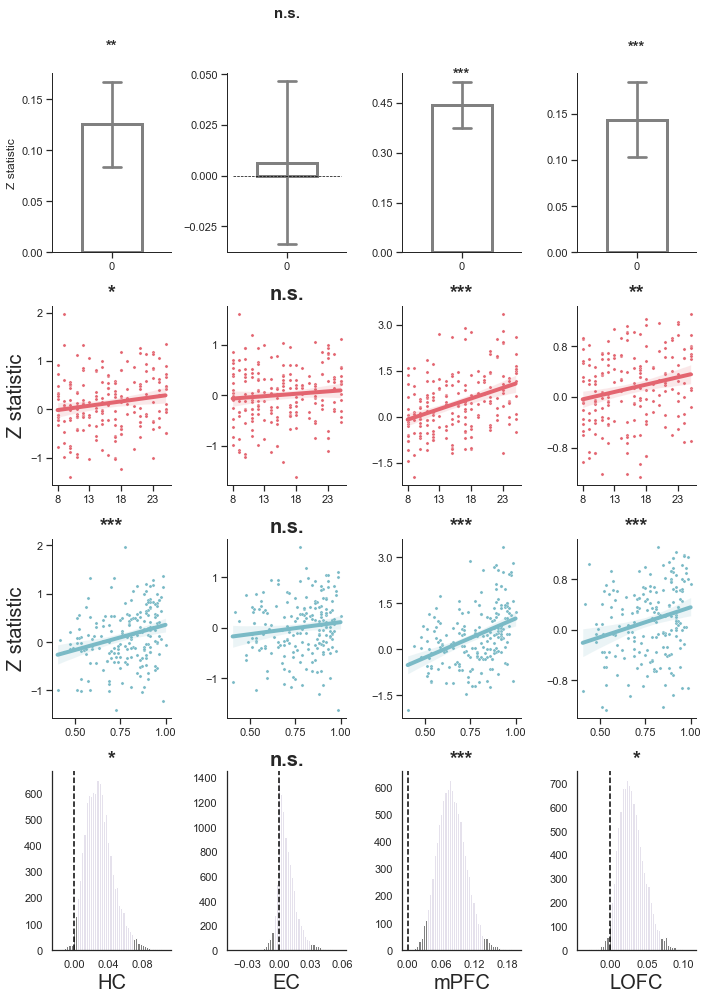

In [45]:
from nilearn import masking, image
from scipy.stats import ttest_1samp, pearsonr,ttest_ind
from matplotlib.ticker import MaxNLocator
import pingouin as pg


def p2sign(p):
    if  p<=0.001:
        sign='***'
    elif p<=0.01:
        sign='**'
    elif p<=0.05:
        sign='*'
    else:
        sign='n.s.'
    return sign


def apply_mask_and_get_activity(cmap_paths, mask):
    return np.mean(masking.apply_mask(cmap_paths, mask), axis=1)


def plot_mean_activity(subs_mean_activity, ax, roi_name):
    t_statistic, p_value = ttest_1samp(subs_mean_activity, 0)
    sns.barplot(data=subs_mean_activity, errorbar="se", capsize=.15, errcolor="0.5",
                linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0),width=0.5,ax=ax)
    ax.hlines(y=0, xmin=-0.45, xmax=0.45, colors='black', linestyles='--', linewidth=0.7)
    ax.set_ylabel('Z statistic')
    ax.set_xlabel(roi_name)
    sns.despine(top=True, right=True)
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    plt.xticks([-0.5, 0.5])
    ax.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
    ax.tick_params(axis='y', which='both', left=True, right=False, direction='out')
    ax.text(0, subs_mean_activity.mean()+0.07, p2sign(p_value),ha='center', va='bottom',weight='bold',size=15)


def plot_covariate_relationship(sub_data,covariate_name, activity_data, ax, roi_name):
    # Setup variables based on covariate
    if covariate_name == 'Age':
        color = '#e36570'
        covary_variable = sub_data['Age'].to_list()

    elif covariate_name == 'Acc':
        color = '#7abac6'
        covary_variable = sub_data['game2_test_acc'].to_list()
    sns.scatterplot(x=covary_variable, y=activity_data, color=color, s=10, alpha=1, ax=ax)
    sns.regplot(x=covary_variable, y=activity_data, color=color, order=1, scatter=False,line_kws={'linewidth': 4}, ax=ax)
    ax.set_xlabel(roi_name, fontsize=20)
    ax.set_ylabel('Z statistic', fontsize=20)
    sns.despine(top=True, right=True)
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    r, p = pearsonr(covary_variable, activity_data)
    title = p2sign(p)
    ax.set_title(title, size=20, fontweight='bold')
    ax.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
    ax.tick_params(axis='y', which='both', left=True, right=False, direction='out')


def perform_mediation_analysis(data, x, m, y):
    # Z-score normalization for x, m, y variables
    data[[x, m, y]] = data[[x,m[0],y]].apply(zscore)
    mediation_results, indirect_effects = pg.mediation_analysis(data=data,
                                                                x=x, m=m, y=y, seed=42, n_boot=10000, return_dist=True)
    return mediation_results, indirect_effects


def plot_mediation_distribution(indirect_effects, mediation_results, ax, ci=0.95):
    p_value = mediation_results.loc[mediation_results['path'] == 'Indirect', 'pval'].values[0]
    lower = np.percentile(indirect_effects, (1 - ci) / 2 * 100)
    upper = np.percentile(indirect_effects, (1 + ci) / 2 * 100)
    n, bins, patches = ax.hist(indirect_effects, color='grey',bins=50)
    max_height = max(n)
    ax.axvline(x=0, ymin=0, ymax=max_height, color='black', linestyle='--')
    for i in range(len(patches)):
        if lower <= bins[i] < upper:
            patches[i].set_fc('#E5E1EC')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    med_title = p2sign(p_value)
    ax.set_title(med_title, size=20, fontweight='bold')


# specify subjects
participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
participants_data = pd.read_csv(participants_tsv, sep='\t')
data = participants_data.query('game2_fmri>=0.5')
subjects = data['Participant_ID'].to_list()


# set camp
cmap_template = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game2/distance_spct/Setall/6fold/{}/zmap/distance_zmap.nii.gz'

sub_cmap_paths = [cmap_template.format(sub_id) for sub_id in subjects]

# set roi
lhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/lHC_MNI152NL.nii.gz')
rhc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/rHC_MNI152NL.nii.gz')
hc = image.math_img('np.logical_or(img1,img2)', img1=lhc, img2=rhc)

ec  = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/EC/juelich_EC_MNI152NL_prob.nii.gz')
ec = image.binarize_img(ec,5)

mPFC = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/Park_Grid_ROI/mPFC_GP_roi.nii')

lofc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/lh.lateralorbitofrontal.nii.gz') #parsorbitalis
rofc = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/aparc/mask/rh.lateralorbitofrontal.nii.gz')
ofc = image.math_img('np.logical_or(img1,img2)', img1=lofc, img2=rofc)
roi_names = ['HC', 'EC',  'mPFC', 'LOFC']

# Compute mean activity
# Apply masks and get activity for each ROI
roi_activities = [apply_mask_and_get_activity(sub_cmap_paths, m) for m in [hc, ec, mPFC,ofc]]

# Add an extra row to the figure for the mediation plots
fig, axes = plt.subplots(4,4, figsize=(10, 14))

# Plot the mean activity for each ROI
for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
    plot_mean_activity(roi_activity, axes[0, i], roi_name)
    # Set y-axis to have a maximum of 3 ticks
    axes[0, i].yaxis.set_major_locator(MaxNLocator(nbins=4))
    if i > 0:
        axes[0, i].set_ylabel('')

# Plot the covariate relationship for each ROI with 'Age'
for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
    plot_covariate_relationship(data,'Age', roi_activity, axes[1, i], roi_name)
    if i > 0:
        axes[1, i].set_ylabel('')  # Hide y label for plots other than the leftmost
    axes[1, i].set_xticks([8, 13, 18, 23])  # Change x-ticks
    axes[1, i].yaxis.set_major_locator(MaxNLocator(nbins=4)) # Change y-ticks

# Plot the covariate relationship for each ROI with 'Acc'
for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
    plot_covariate_relationship(data,'Acc', roi_activity, axes[2, i], roi_name)
    if i > 0:
        axes[2, i].set_ylabel('')  # Hide y label for plots other than the leftmost
    axes[2, i].set_xticks([0.5, 0.75, 1.0])  # Change x-ticks
    axes[2, i].yaxis.set_major_locator(MaxNLocator(nbins=4))

# loop through each ROI to perform mediation analysis:
roi_mediation_results = {}
roi_indirect_effects = {}
for i, (roi_name, roi_activity) in enumerate(zip(roi_names, roi_activities)):
    # Add the mean ROI activity to the data
    data[roi_name] = roi_activity
    mediation_results, indirect_effects = perform_mediation_analysis(data, 'Age', [roi_name], 'game2_test_acc')
    roi_mediation_results[roi_name] = mediation_results
    roi_indirect_effects[roi_name] = indirect_effects


# Plot the mediation distribution for each ROI
for i, (roi_name, indirect_effects) in enumerate(roi_indirect_effects.items()):
    mediation_results = roi_mediation_results[roi_name]
    plot_mediation_distribution(indirect_effects, mediation_results, axes[3, i])
    if i > 0:
        axes[3, i].set_ylabel('')
    axes[3,i].set_xlabel(roi_name, fontsize=20)
    axes[3, i].xaxis.set_major_locator(MaxNLocator(nbins=4))

# Hide x labels for plots other than those in the bottom row
for i in range(3):
    for j in range(4):
        if i < 3:
            axes[i, j].set_xlabel('')

# Show the plot
plt.tight_layout()
plt.savefig(r'/mnt/workdir/DCM/Result/paper/sf/sf4/Game2_Distance_multi-ROIs_effect.pdf',dpi=300,bbox_inches='tight',pad_inches=0, transparent=True)
plt.show()

In [44]:
mediation_results = pg.mediation_analysis(data, 'Age', ['HC','EC','mPFC','LOFC'], 'game2_test_acc')

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,HC ~ X,0.1648,0.0714,0.0220,0.0241,0.3056,Yes
1,EC ~ X,0.0913,0.0721,0.2065,-0.0508,0.2335,No
2,mPFC ~ X,0.3811,0.0669,0.0000,0.2492,0.5131,Yes
3,LOFC ~ X,0.2207,0.0706,0.0020,0.0815,0.3599,Yes
4,Y ~ HC,0.1435,0.1027,0.1639,-0.0590,0.3460,No
5,Y ~ EC,-0.0577,0.0976,0.5552,-0.2503,0.1349,No
6,Y ~ mPFC,0.3381,0.0924,0.0003,0.1558,0.5203,Yes
7,Y ~ LOFC,-0.0018,0.0922,0.9845,-0.1837,0.1801,No
8,Total,0.5612,0.0599,0.0000,0.4431,0.6794,Yes
9,Direct,0.4855,0.0631,0.0000,0.3610,0.6100,Yes
